Задача №1

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- OLS --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед для OLS :  (8.674530469644044, 0.03394627720143216, 3.2185833267666917, 0.031240642837403458)
Тест на Гетероск для OLS (White):  (28.798130970773073, 0.00034402648974435725, 6.961198610450688, 9.240516650520329e-06) 

abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     19.38
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.88e-08
Time:             

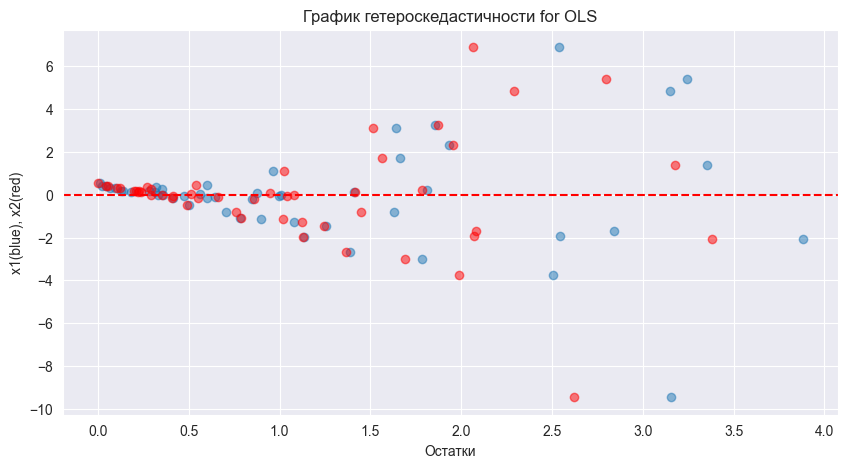

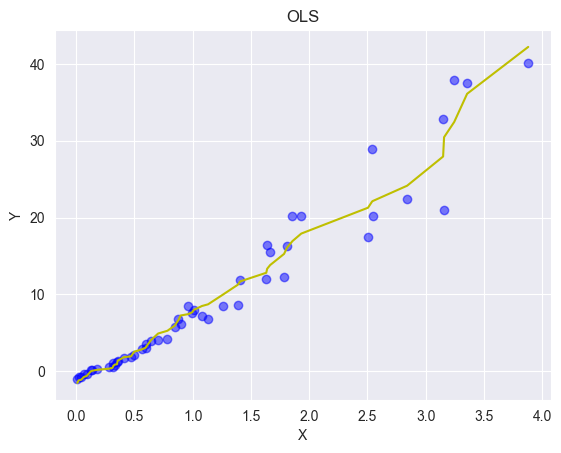

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- WLS --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед для WLS :  (7.398887942712312, 0.06021416862071076, 2.6630669868201515, 0.05899261122381006)
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     19.86
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.11e-08
Time:                        15:05:12   Log-Likelihood:                -83.298
No. Observations:                  50   AIC:                             174.6
Df Residuals:                  

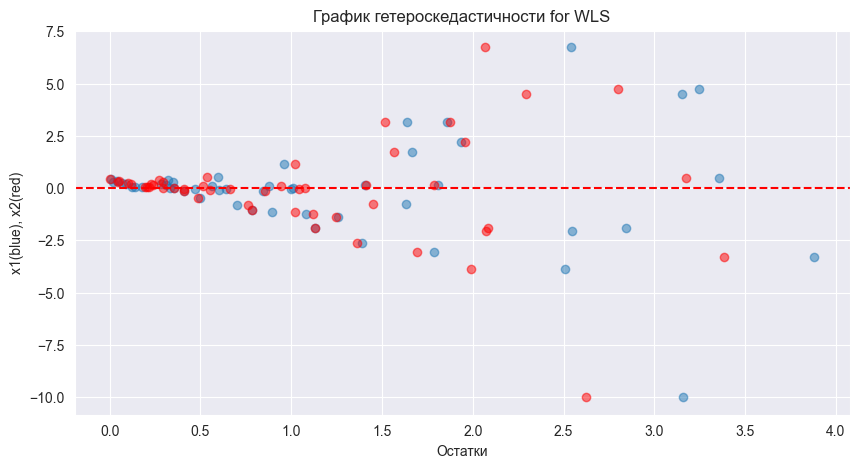

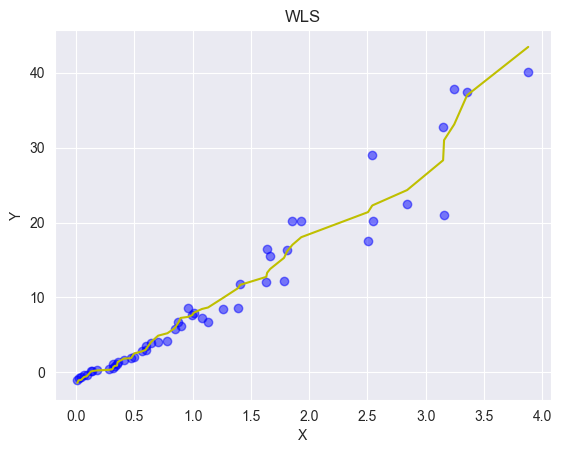

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- OLS_new --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед OLS_new :  (2.718610543339989, 0.43707388667576763, 0.8816441763573156, 0.4576193398212004)
Тест на Гетероск для OLS_new (White):  (19.612574980785098, 0.011905524529664698, 3.307764534604866, 0.005257289664393408)
abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8307
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.484
Time:            

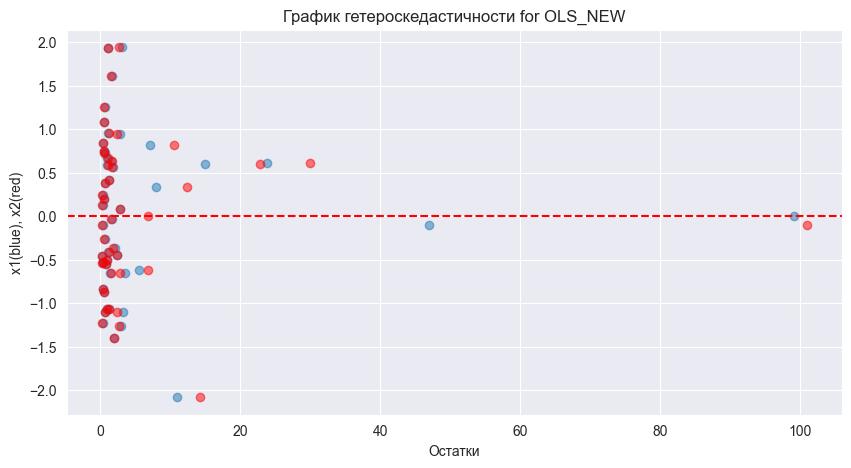

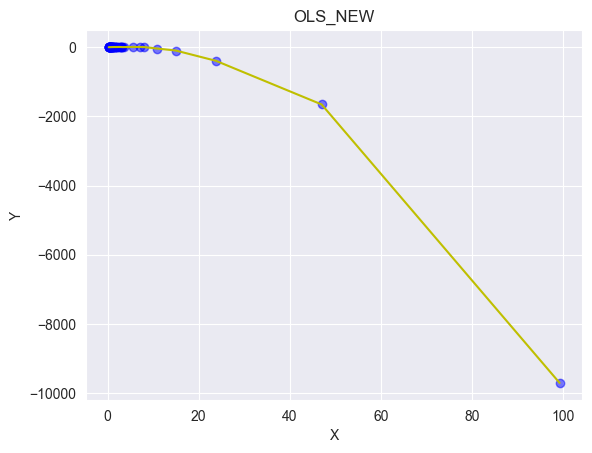

# ---------------------------------------------------------------------------------------------
 # ----------------------------------- WLS_new --------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
Тест Бройша - Пагана на Гетероскед для WLS_new :  (3.6357406671257086, 0.3035790233426653, 1.2023921952974324, 0.31948029091491875)
Тест на Гетероск для WLS_new (White):  (27.861250573111167, 0.0005013627010267403, 6.449727870074227, 2.047394762204944e-05)
abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.9001
Date:                Tue, 09 Apr 2024   Prob (F-statistic):              0.448
Time:     

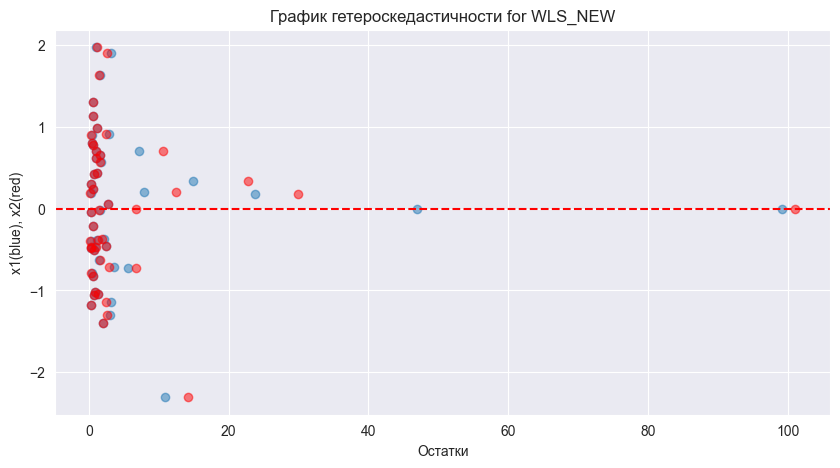

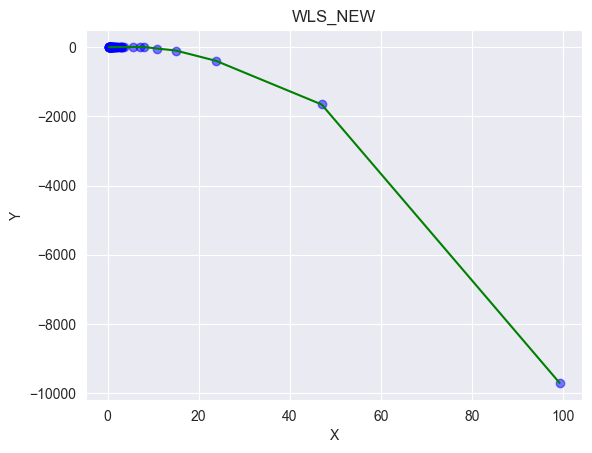

In [100]:
import pc
import statsmodels.api as sm
import statsmodels.stats.api as ssa
from sklearn.linear_model import LinearRegression
import scipy
import numpy as np
import random
import sklearn
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
import math
from scipy.stats import bws_test
from sklearn import linear_model 
import csv

X0 = np.ones(50)
X1 = np.random.exponential(1, 50)
X1.sort()
X2 = np.random.exponential(1, 50)
X2.sort()
X1_2 = X1**2
delta = np.random.normal(0,1,size=X1.shape)
eps =delta*X1_2

Y = - X0 + X1 +2*X1_2 + 5*X2 + eps


# ---------------------------------------------------------------------------------------------
# ----------------------------------- OLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- OLS --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")

Xmat =  sm.add_constant(np.column_stack((X0, X1, X1_2, X2)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест Бройша - Пагана на Гетероскед для OLS : ",test01)
test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02, "\n")

model2 = sm.OLS(abs(model.resid), Xmat).fit()
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")


print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model.summary())

b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model.resid, alpha=0.5)
plt.scatter(X2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for OLS')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y, color = 'b', alpha=0.5, label='X1, Y')
plt.plot(X1, Yplt, color='y', label='OLS')
plt.title('OLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS ---------------------------------------------------  
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- WLS --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")

weight = 1/(model.resid**2)
model_W = sm.WLS(Y, Xmat, weights= weight).fit()

test01 = ssa.het_breuschpagan(model_W.resid**2, Xmat)
print("Тест Бройша - Пагана на Гетероскед для WLS : ",test01)
model2 = sm.OLS(abs(model_W.resid), Xmat).fit()
print(model2.summary())
test02 = ssa.het_white(model_W.resid**2, Xmat)
print("Тест на Гетероск для WLS (White): ",test02, "\n")
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")
print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model_W.summary())

b = model_W.params
plt.figure(figsize=(10, 5))
plt.scatter(X1, model_W.resid, alpha=0.5)
plt.scatter(X2, model_W.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for WLS')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1 + b[2]*X1_2 + b[3]*X2

plt.scatter(X1, Y, color = 'b', alpha=0.5, label='X1, Y')
plt.plot(X1, Yplt, color='y', label='WLS')
plt.title('WLS')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


# ---------------------------------------------------------------------------------------------
# ----------------------------------- OLS_new ------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- OLS_new --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")
Ynew = Y/X1_2
X1_2new = 1/X1_2
X1new = 1/X1
X2new = X2/X1_2

Xmat_new =  sm.add_constant(np.column_stack((X0, X1new, X1_2new, X2new)))
model_OLS_new = sm.OLS(Ynew, Xmat_new).fit()

test01 = ssa.het_breuschpagan(model_OLS_new.resid**2, Xmat_new)
print("Тест Бройша - Пагана на Гетероскед OLS_new : ",test01)
test02 = ssa.het_white(model_OLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для OLS_new (White): ",test02)
model2 = sm.OLS(abs(model_OLS_new.resid), Xmat).fit()
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")
print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model_OLS_new.summary())

b = model_OLS_new.params
plt.figure(figsize=(10, 5))
plt.scatter(X1new, model_OLS_new.resid, alpha=0.5)
plt.scatter(X2new, model_OLS_new.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for OLS_NEW')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new , Ynew, color = 'b', alpha=0.5 , label='X1_new, Ynew')
plt.plot(X1new, Yplt, color='y', label='OLS_new')
plt.title('OLS_NEW')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- WLS_new ------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
print("# ---------------------------------------------------------------------------------------------\n # ----------------------------------- WLS_new --------------------------------------------------- \n# ---------------------------------------------------------------------------------------------")

weight = 1/(model_OLS_new.resid**2)
model_WLS_new = sm.WLS(Ynew, Xmat_new, weights= weight).fit()
# model0 = sm.OLS(model_WLS_new.resid, X1new).fit()
# model1 = sm.OLS(model_WLS_new.resid, X1new).fit()
test01 = ssa.het_breuschpagan(model_WLS_new.resid**2, Xmat_new)
print("Тест Бройша - Пагана на Гетероскед для WLS_new : ",test01)
test02 = ssa.het_white(model_WLS_new.resid**2, Xmat_new)
print("Тест на Гетероск для WLS_new (White): ",test02)
model2 = sm.OLS(abs(model_WLS_new.resid), Xmat).fit()
print("abs(model.resid) ; Xmat = {X0, X1, X1_2, X2}\n", model2.summary(), "\n")
print("Y = - X0 + X1 +2*X1_2 + 5*X2 + eps ; Xmat = {X0, X1, X1_2, X2} \n",model_WLS_new.summary())

b = model_WLS_new.params

plt.figure(figsize=(10, 5))
plt.scatter(  X1new, model_WLS_new.resid,alpha=0.5)
plt.scatter( X2new, model_WLS_new.resid,color = 'r', alpha=0.5)
# plt.plot(model0.predict(X1new), model_WLS_new.resid, color='y', linestyle='--')
# plt.plot(model0.predict(X2new), model_WLS_new.resid, color='g', linestyle='--')

plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности for WLS_NEW')
plt.xlabel('Остатки')
plt.ylabel('x1(blue), x2(red)')
plt.show()
Yplt = b[0] + b[1]*X1new + b[2]*X1_2new + b[3]*X2new

plt.scatter(X1new, Ynew, color = 'b', alpha=0.5, label='X1_new, Ynew')
plt.plot(X1new, Yplt, color='g', label='WLS_new')
plt.title('WLS_NEW')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

Задача №2

Тест на Гетероск для OLS :  (5.45768630703467, 0.019482427360839265, 5.657289706558081, 0.019321673269215748)
Тест на Гетероск для OLS (White):  (33.64345449267214, 4.9478517754099845e-08, 24.590001339271154, 2.2980675213011504e-09)
Coefficients : [1.68204476 0.29303429]


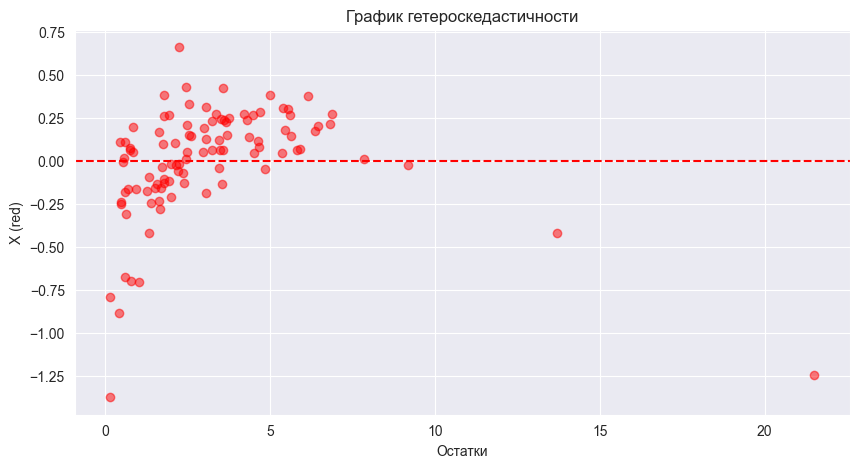

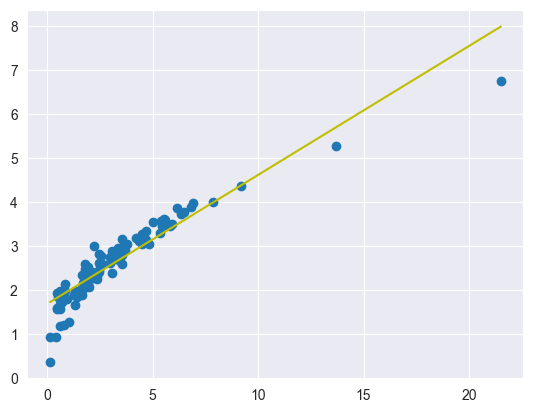

Тест на Гетероск для OLS boxcox :  (13.93750268902858, 0.00018898990425747527, 15.870737036475424, 0.00013043192558448823)
Тест на Гетероск для OLS (White) boxcox:  (38.34726906798264, 4.709733397650667e-09, 30.16642607199267, 6.496619812623908e-11)
Coefficients : [0.69118508 0.5650782 ]


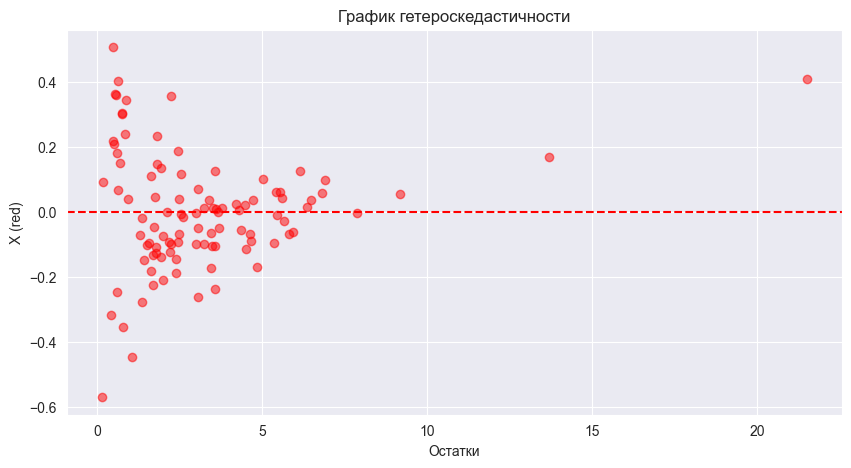

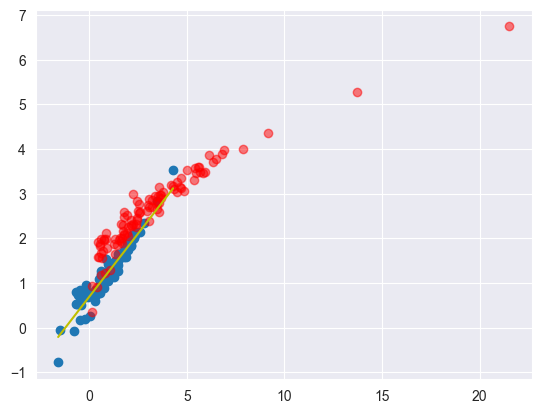

Lambda for Y: 0.589424530137582
Lambda for X: 0.2085526772553622
Тест на Гетероск для OLS :  (0.18315359908789297, 0.6686769784719979, 0.1798198736766508, 0.6724574604090724)
Тест на Гетероск для OLS (White):  (0.4650459298751741, 0.7925315487002389, 0.22660107506610602, 0.7976595857261821)
Coefficients : [0.25517556 1.00101253]


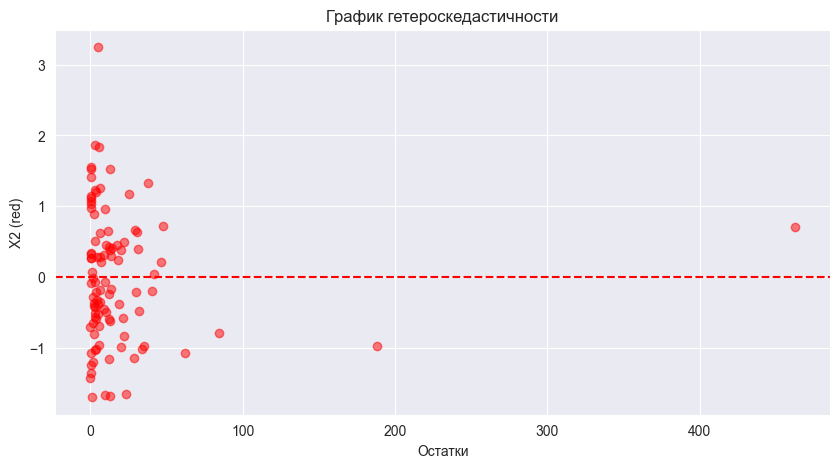

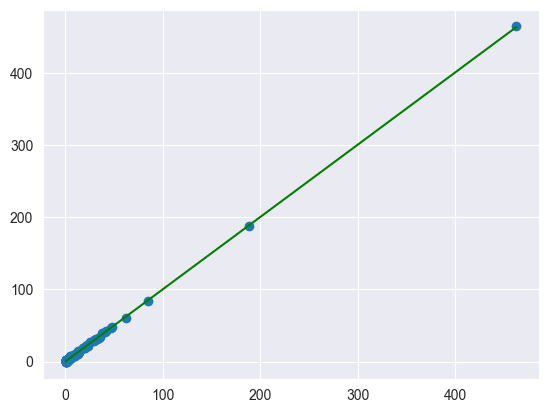

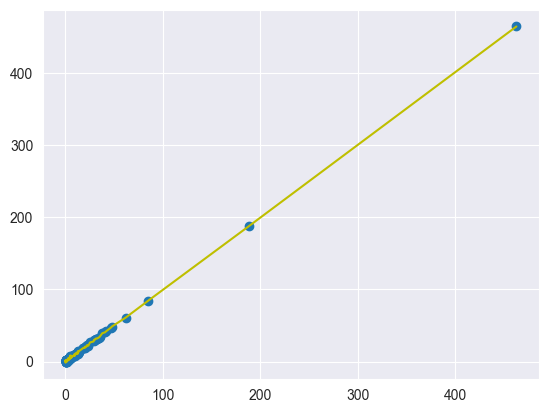

Тест на Гетероск для OLS boxcox :  (7.101269092910001, 0.007702939217705533, 7.4912150500870505, 0.007363077423931819)
Тест на Гетероск для OLS (White) boxcox:  (10.596074813083945, 0.005001399995992622, 5.748177469391244, 0.0043731507002961)
Coefficients : [0.59650179 0.61841979]


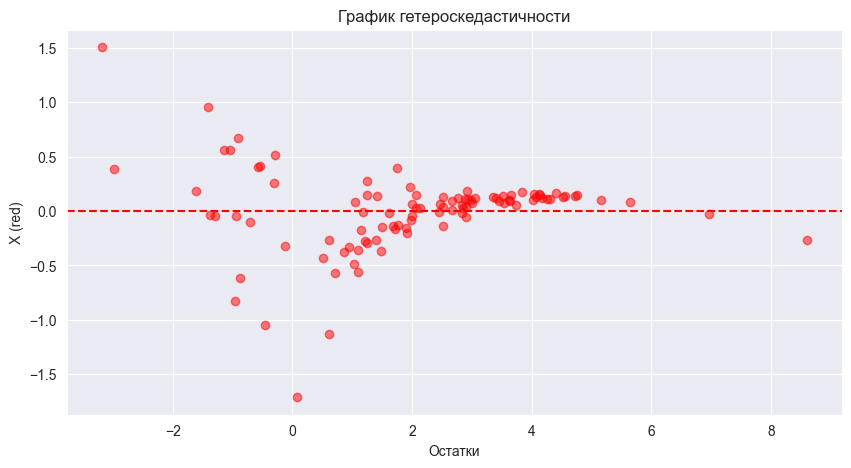

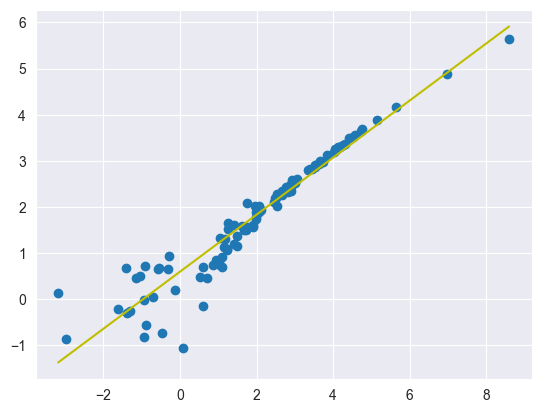

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     990.7
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.87e-53
Time:                        13:55:38   Log-Likelihood:                 28.995
No. Observations:                 100   AIC:                            -53.99
Df Residuals:                      98   BIC:                            -48.78
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6912      0.026     27.074      0.0

In [90]:
X0 = np.ones(100)
X = np.random.chisquare(3,100)
X.sort()
X2 = X**2
eps = np.random.normal(0,1,size=X.shape)

Y = np.sqrt(abs(2*X + X0 + eps))
Y2 = X2 + eps

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y ----------------------------------------------------- 
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X&Y  ----------------------------------------------\n# ---------------------------------------------------------------------------------------------')



Xmat =  sm.add_constant(np.column_stack((X0, X)))
model = sm.OLS(Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)


b = model.params
print("Coefficients :", b)

plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*X

plt.scatter(X, Y)
plt.plot(X, Yplt, color='y')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y BoxCox ----------------------------------------------
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X&Y BoxCox  ----------------------------------------------\n# ---------------------------------------------------------------------------------------------')


transformed_Y, lambda_Y = sps.boxcox(Y)
transformed_X, lambda_X = sps.boxcox(X)
# transformed_X0, lambda_X0 = sps.boxcox(X0)
# transformed_epsilon, lambda_epsilon = sps.boxcox(eps)
Xmat =  sm.add_constant(np.column_stack((X0, transformed_X)))

model_boxcox = sm.OLS(transformed_Y, Xmat).fit()

test01 = ssa.het_breuschpagan(model_boxcox.resid**2, Xmat)
print("Тест на Гетероск для OLS boxcox : ",test01)

test02 = ssa.het_white(model_boxcox.resid**2, Xmat)
print("Тест на Гетероск для OLS (White) boxcox: ",test02)


b = model_boxcox.params
print("Coefficients :", b)

plt.figure(figsize=(10, 5))
plt.scatter(X, model_boxcox.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*transformed_X

plt.scatter(transformed_X, transformed_Y)
plt.scatter(X, Y, color = 'r', alpha=0.5)
plt.plot(transformed_X, Yplt, color='y')
plt.show()

print(model_boxcox.summary())
print('Lambda for Y:', lambda_Y)
print('Lambda for X:', lambda_X)
# print('Transformed epsilon:', transformed_epsilon)
# print('Lambda epsilon', lambda_epsilon)


# ---------------------------------------------------------------------------------------------
# ----------------------------------- X2&Y2 ---------------------------------------------------
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X2&Y2  ----------------------------------------------\n# ---------------------------------------------------------------------------------------------')

Xmat =  sm.add_constant(np.column_stack((X0, X2)))
model = sm.OLS(Y2, Xmat).fit()

test01 = ssa.het_breuschpagan(model.resid**2, Xmat)
print("Тест на Гетероск для OLS : ",test01)

test02 = ssa.het_white(model.resid**2, Xmat)
print("Тест на Гетероск для OLS (White): ",test02)

b = model.params
print("Coefficients :", b)
plt.figure(figsize=(10, 5))
plt.scatter(X2, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X2 (red)')
plt.show()
Yplt = b[0]+b[1]*X2

plt.scatter(X2, Y2, color = 'b', alpha=0.5, label='X2, Y2')
plt.plot(X2, Yplt, color='g', label='transformed_X2, Yplt')
plt.title('OLS')
plt.xlabel('X2')
plt.ylabel('Y2')
plt.show()



# ---------------------------------------------------------------------------------------------
# ----------------------------------- X&Y BoxCox ----------------------------------------------
# ---------------------------------------------------------------------------------------------
print('# ---------------------------------------------------------------------------------------------\n#----------------------------------- X2&Y2 BoxCox ----------------------------------------------\n# ---------------------------------------------------------------------------------------------')

transformed_Y2, lambda_Y2 = sps.boxcox(abs(Y2))
transformed_X2, lambda_X2 = sps.boxcox(X2)
# transformed_epsilon, lambda_epsilon = sps.boxcox(eps)
Xmat =  sm.add_constant(np.column_stack((X0, transformed_X2)))

model_boxcox2 = sm.OLS(transformed_Y2, Xmat).fit()

test01 = ssa.het_breuschpagan(model_boxcox2.resid**2, Xmat)
print("Тест на Гетероск для OLS boxcox : ",test01)

test02 = ssa.het_white(model_boxcox2.resid**2, Xmat)
print("Тест на Гетероск для OLS (White) boxcox: ",test02)


b = model_boxcox2.params
print("Coefficients :", b)

plt.figure(figsize=(10, 5))
plt.scatter(transformed_X2, model_boxcox2.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()
Yplt = b[0] + b[1]*transformed_X2

plt.scatter(transformed_X2, transformed_Y2, color = 'b', alpha=0.5, label='transformed_X2, transformed_Y2')
plt.plot(transformed_X2, Yplt, color='y' , label='transformed_X2, Yplt')
plt.title('OLS_transform')
plt.xlabel('transformed_X2')
plt.ylabel('transformed_Y2')
plt.show()

print(model_boxcox.summary())
print('Lambda for Y2:', lambda_Y2)
print('Lambda for X2:', lambda_X2)
# print('Transformed epsilon:', transformed_epsilon)
# print('Lambda epsilon', lambda_epsilon)

Задача №3

In [ ]:
f = open('SLEEP75.txt')
lines = f.readlines()
f.close()



Задача №5

<Wald test (chi2): statistic=370.7113705555484, p-value=3.169922864866629e-81, df_denom=2>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.640
Method:                 Least Squares   F-statistic:                     219.5
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           4.79e-29
Time:                        13:50:21   Log-Likelihood:                -1230.4
No. Observations:                 124   AIC:                             2465.
Df Residuals:                     122   BIC:                             2471.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

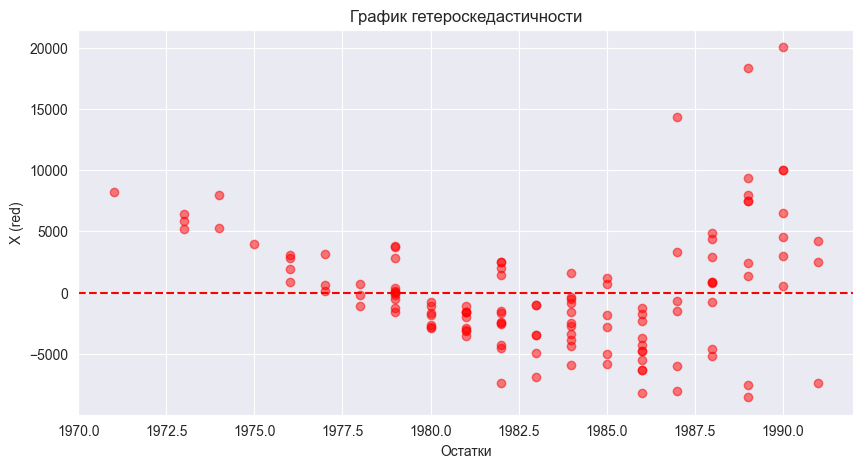

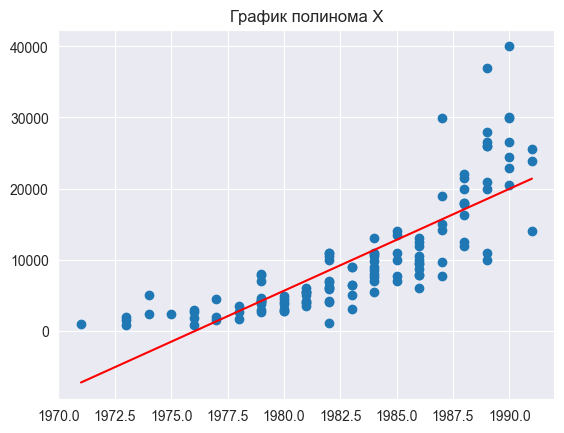

<Wald test (chi2): statistic=2.322895971519853, p-value=0.12748249040272275, df_denom=1>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           3.02e-37
Time:                        13:50:22   Log-Likelihood:                -1208.1
No. Observations:                 124   AIC:                             2422.
Df Residuals:                     121   BIC:                             2431.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------

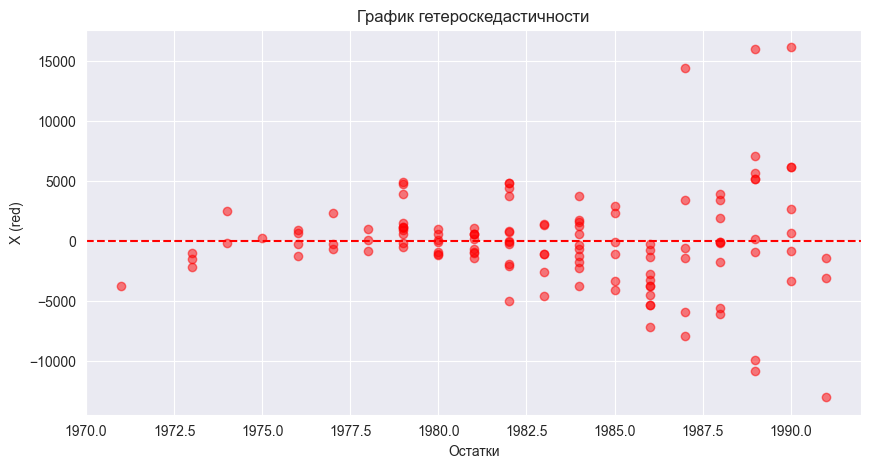

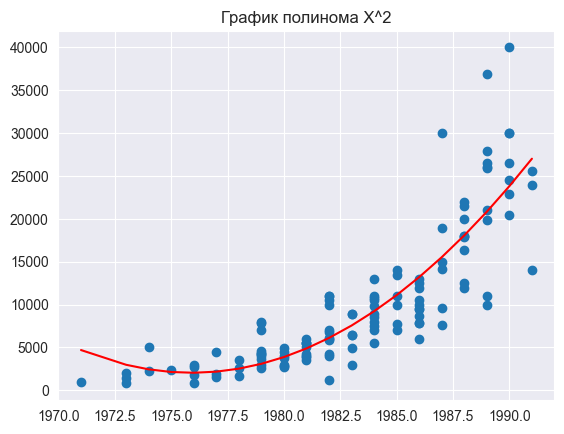

<Wald test (chi2): statistic=2.3188803956341446, p-value=0.12781199122709672, df_denom=1>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     182.4
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           3.01e-37
Time:                        13:50:22   Log-Likelihood:                -1208.1
No. Observations:                 124   AIC:                             2422.
Df Residuals:                     121   BIC:                             2431.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

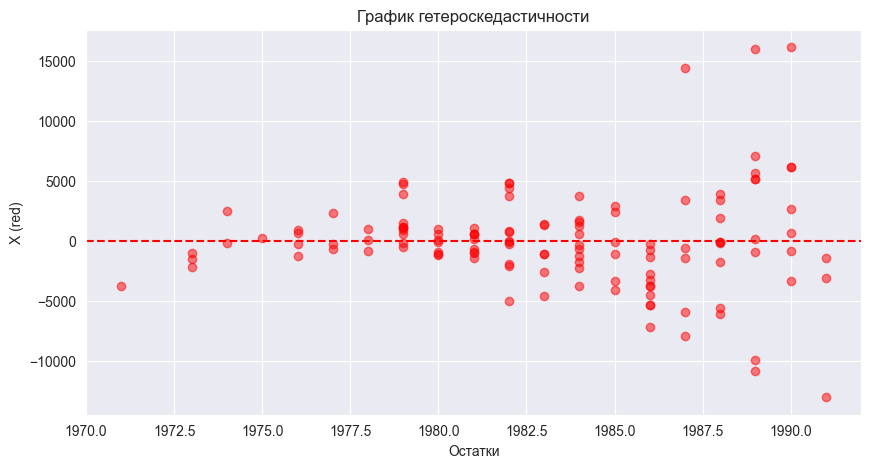

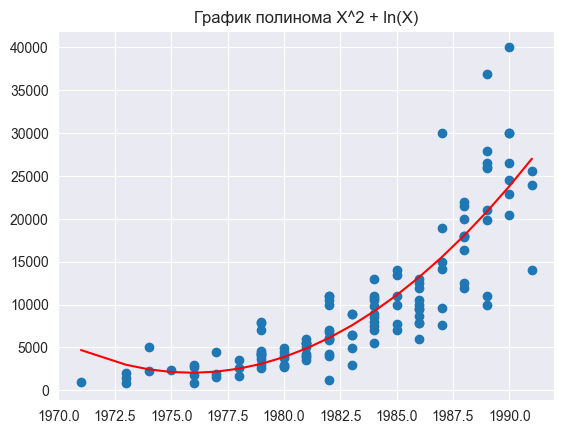

<Wald test (chi2): statistic=59.21601404698907, p-value=1.3848601854749791e-13, df_denom=2>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     182.5
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           2.92e-37
Time:                        13:50:22   Log-Likelihood:                -1208.1
No. Observations:                 124   AIC:                             2422.
Df Residuals:                     121   BIC:                             2431.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

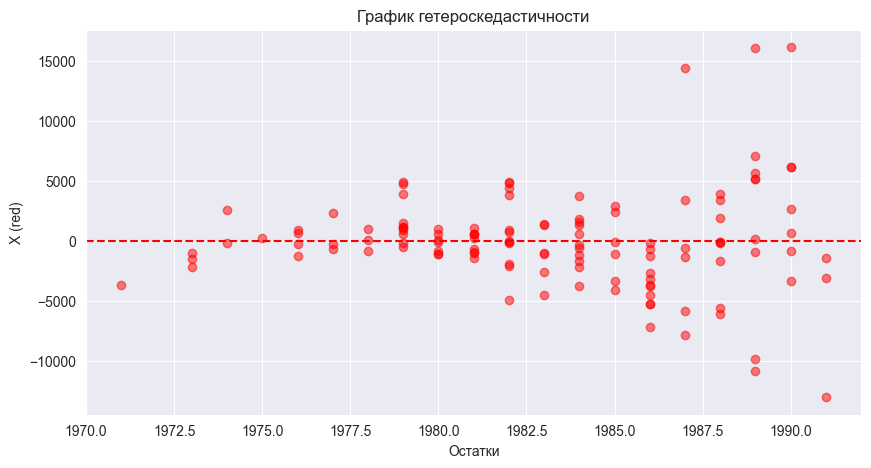

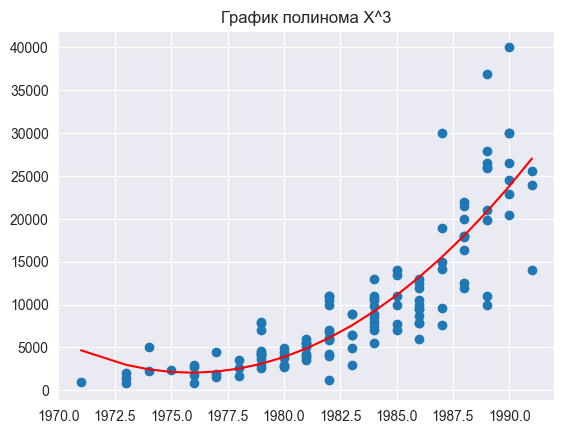

<Wald test (chi2): statistic=33.851733972128514, p-value=4.458506113924339e-08, df_denom=2>
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     182.6
Date:                Mon, 01 Apr 2024   Prob (F-statistic):           2.83e-37
Time:                        13:50:22   Log-Likelihood:                -1208.0
No. Observations:                 124   AIC:                             2422.
Df Residuals:                     121   BIC:                             2431.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

/Library/Python/3.9/site-packages/statsmodels/base/model.py:1896: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '


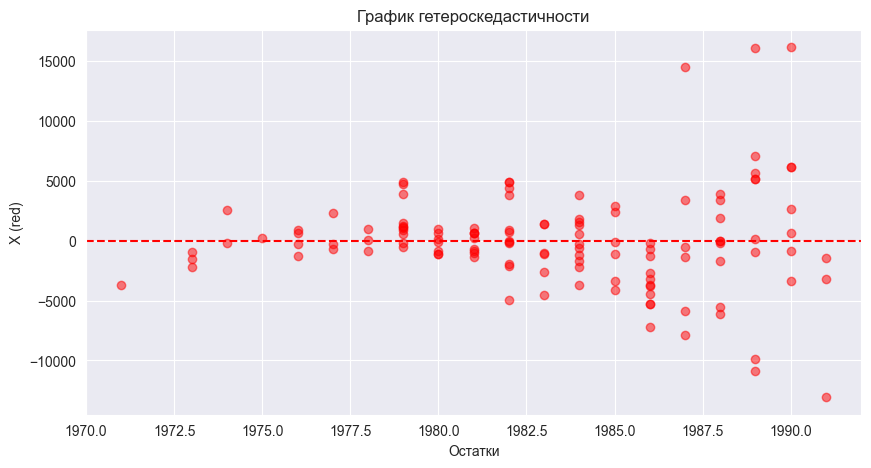

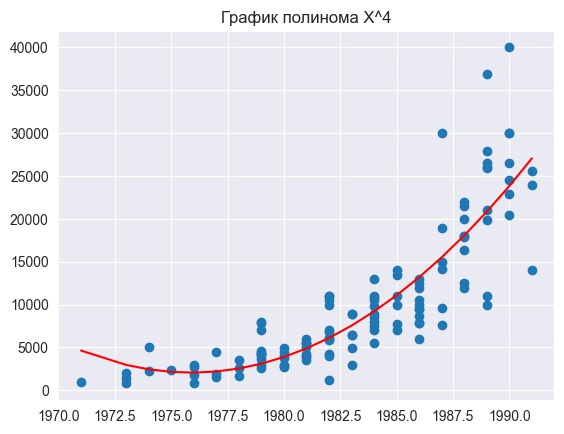

In [79]:
import statsmodels.stats.diagnostic

f = open('mazda.txt')
lines = f.readlines()
f.close()
lines.pop(0)

year =[]
price = []
for line in lines:
    words=line.split()
    year.append(int(words[0]))
    price.append(int(words[1]))
    
# print(price)
# print(year)

temp = zip(year,price)
Ts = sorted(temp, key=lambda tup: tup[0])
years = [temp[0]+1900 for temp in Ts]
prices = [temp[1] for temp in Ts]

Y = np.array(prices)
X = np.array(years)

n = len(X)
X0 = np.ones(n)

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X ----------------------------------------------
# ---------------------------------------------------------------------------------------------


Xmat = sm.add_constant(np.column_stack((X0, X)))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^2 ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2)))
model = sm.OLS(Y, Xmat).fit()

print(statsmodels.stats.diagnostic.linear_reset(model, power=2, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^2')
plt.show()

# print("fdkmvwkemf :",T.ContrastResults())

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^2 + ln(X) -------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2, np.log(X))))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, power=2, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2 + b[3]*np.log(X)

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^2 + ln(X)')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^3 ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2, X**3)))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, power=3, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2 + b[3]*X**3

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^3')
plt.show()

# ---------------------------------------------------------------------------------------------
# ----------------------------------- polynom X^4 ----------------------------------------------
# ---------------------------------------------------------------------------------------------

Xmat = sm.add_constant(np.column_stack((X0, X, X**2, X**3, X**4)))
model = sm.OLS(Y, Xmat).fit()
print(statsmodels.stats.diagnostic.linear_reset(model, power=4, test_type='fitted', use_f=False, cov_type='nonrobust', cov_kwargs=None))

print(model.summary())
b = model.params
plt.figure(figsize=(10, 5))
plt.scatter(X, model.resid,color = 'r', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График гетероскедастичности')
plt.xlabel('Остатки')
plt.ylabel('X (red)')
plt.show()

Yplt = b[0] + b[1]*X + b[2]*X**2 + b[3]*X**3 + b[4]*X**4

plt.scatter(X, Y)
plt.plot(X, Yplt, color='r')
plt.title('График полинома X^4')
plt.show()